In [1]:
#impoted some libraries that i will need in my analysis
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import re

style.use('ggplot')
sns.set(style="darkgrid")



In [2]:
#to view plots in same window
%matplotlib inline

In [3]:
path = r'C:\Users\mohab\Downloads\Wuzzuf_Applications_Sample.csv.zip'
path2 = r"C:\Users\mohab\Downloads\Wuzzuf_Job_Posts_Sample.csv.zip"

In [4]:

zf = zipfile.ZipFile(path) 
df = pd.read_csv(zf.open('Wuzzuf_Applications_Sample.csv'))

In [5]:

zf2 = zipfile.ZipFile(path2) 
df2 = pd.read_csv(zf2.open('Wuzzuf_Job_Posts_Sample.csv'))

### Data Wrangling

#### Data Quality issues
- Date columns format needs to be adjusted to date time format.
- Null values should be dealt with.
- City column in 'df2' has the following inconsistency issues: differnet names for the same value , different langauages
    and multiple values for the same data point.
- Salary columns contain many outliers.

In [6]:
df.head()

,id,user_id,job_id,app_date
0,ba7b8f17,846d013c,516e4ed,2014-01-01 07:27:52
1,30e1ae86,9d5e32c5,516e4ed,2014-01-01 08:20:42
2,d829a6b7,eb26a291,516e4ed,2014-01-01 10:30:37
3,3f985f37,7b5e68a8,516e4ed,2014-01-01 10:55:07
4,27e1695,76fa79b1,516e4ed,2014-01-01 11:00:26


In [7]:
#checking for duplicates
any(df.duplicated())

False

In [8]:
# No nulls
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854190 entries, 0 to 1854189
Data columns (total 4 columns):
id          1854190 non-null object
user_id     1854190 non-null object
job_id      1854190 non-null object
app_date    1854190 non-null object
dtypes: object(4)
memory usage: 56.6+ MB


In [9]:
#changing date column to date format
df.app_date= pd.to_datetime(df.app_date)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21850 entries, 0 to 21849
Data columns (total 20 columns):
id                  21850 non-null object
city                21850 non-null object
job_title           21850 non-null object
job_category1       21850 non-null object
job_category2       21850 non-null object
job_category3       21850 non-null object
job_industry1       21850 non-null object
job_industry2       21850 non-null object
job_industry3       21850 non-null object
salary_minimum      21850 non-null int64
salary_maximum      21850 non-null int64
num_vacancies       21850 non-null int64
career_level        21850 non-null object
experience_years    21850 non-null object
post_date           21850 non-null object
views               21850 non-null int64
job_description     21576 non-null object
job_requirements    19217 non-null object
payment_period      21845 non-null object
currency            21845 non-null object
dtypes: int64(4), object(16)
memory usage: 3.3+ MB


In [11]:
#changing date column to date format
df2.post_date= pd.to_datetime(df2.post_date)

In [12]:
#Assessment 
type(df2.post_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
# looked into the contents of job_description and job_requirements
df2.job_requirements.sample(5);
df2.job_description.sample(5)

# we can drop them as they are excluded from the analyses.
df2.drop(["job_description" , 'job_requirements'] ,axis= 1,inplace= True)

In [14]:
# Take a look at nulls of currency 
df2.loc[df2.currency.isnull(),: ]

# The null records for currency and payment_period are mutual and cant be filled by average as they are strings.
# So they can be removed  
df2.dropna( inplace=True)

In [15]:
#Assessing that the dataframe is fine and clean 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21845 entries, 0 to 21849
Data columns (total 18 columns):
id                  21845 non-null object
city                21845 non-null object
job_title           21845 non-null object
job_category1       21845 non-null object
job_category2       21845 non-null object
job_category3       21845 non-null object
job_industry1       21845 non-null object
job_industry2       21845 non-null object
job_industry3       21845 non-null object
salary_minimum      21845 non-null int64
salary_maximum      21845 non-null int64
num_vacancies       21845 non-null int64
career_level        21845 non-null object
experience_years    21845 non-null object
post_date           21845 non-null datetime64[ns]
views               21845 non-null int64
payment_period      21845 non-null object
currency            21845 non-null object
dtypes: datetime64[ns](1), int64(4), object(13)
memory usage: 3.2+ MB


In [16]:
#Added new column with None value to hold the unified name for the cities with inconsistent names 
df2['Cleaned_city']= None

#assuring the column was added
df2.sample(3)

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,payment_period,currency,Cleaned_city
20490,583ca6dd,Cairo,Electrical Engineer,Engineering,Installation/Maintenance/Repair,Select,Engineering - Mechanical or Industrial,Select,Select,6000,7000,1,Experienced (Non-Manager),1-3,2016-04-14 08:04:19,2707,Per Month,Egyptian Pound,None
1689,76f53896,Cairo,Unit Manger,Marketing,Sales/Retail/Business Development,Select,Insurance,Select,Select,1200,5000,8,Entry Level,0-7,2014-05-07 23:05:36,2,Per Month,Egyptian Pound,None
98,78201426,Cairo,Customer Care Agent,Customer Service/Support,Select,Select,Marketing and Advertising,Select,Select,1000,1300,4,Entry Level,0-2,2014-01-12 09:01:43,2692,Per Month,Egyptian Pound,None


In [17]:

#Tried to cluster the cities near each other under a unified name of the Big major cities
#I have used regular expressions to extract city names by the spelling pattern
for i in df2.index:
# Using range(len(df2)) will raise an error as some records were removed ,so sequential loop over the length is inaccurate.
    x=df2.loc[i,'city'].strip().lower()
    
    if re.search('.*c\w+ro|g\w*za|j\w*za|القاهرة|october|maadi|n\w*sr|sadat|zay\w*d|hel+w\w*n',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']= 'Cairo'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"    
    
    if re.search('al\w*x\w*|الإسكندرية|الاسكندرية',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Alexandria'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"
            
    if re.search('h\w*r\w*g',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Hurghada'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities" 
            
    if re.search('m\w*ns\w*r|المنصورة',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Mansoura'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"            
        
    if re.search('d\w*m+\w*t',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Damiet'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"

        
    if re.search('kafr.*|كفر',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Kafr El-Sheikh'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"
            
    if re.search('sharm.*',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Sharm El-Sheikh'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"
        
    if re.search('port.*',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Port Said'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"

    if re.search('as\w*t',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Assuit'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"
        
    if re.search('f\w*i\w*m|f\w*y\w*m',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Fayoum'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"
        
    if re.search('m\w*f\w*a',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Menofiya'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"
        
    if re.search('ism\w+a',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='Ismalia'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"

    if re.search('ram\w+n|sh\w*rk',x):
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']='El-Skarkyah'
        else:
            df2.loc[i,'Cleaned_city']= "2 or More cities"
    
            
    else :
        if df2.loc[i,'Cleaned_city']==None :
            df2.loc[i,'Cleaned_city']= 'Others'
        
        
        

In [18]:
#result of cleaning 
df2.Cleaned_city.value_counts()

Cairo               19565
Alexandria           1030
Others                547
2 or More cities      193
El-Skarkyah           167
Mansoura              100
Menofiya               60
Ismalia                60
Assuit                 44
Hurghada               22
Port Said              18
Sharm El-Sheikh        13
Damiet                 10
Kafr El-Sheikh         10
Fayoum                  6
Name: Cleaned_city, dtype: int64

In [19]:
# Compare with the original uncleaned column to see the difference
df2.city.value_counts()

Cairo                                                      14986
Giza                                                        3886
Alexandria                                                   989
6th of October                                                90
Mansoura                                                      89
New Cairo                                                     85
10th of Ramadan                                               81
Any                                                           60
Giza / Cairo                                                  45
Ismailia                                                      39
Cairo / Giza                                                  36
10th of ramadan city                                          36
6th of October City                                           35
nasr city                                                     32
Tanta                                                         32
menoufia                 

In [20]:
# The non-uniform currency affects the analyses.
df2.currency.value_counts()

Egyptian Pound              21476
United States Dollar          254
Saudi Arabian Riyal            67
U.A. Emirates Dirham           16
Euro                           11
Qatari Riyal                    5
Canadian Dollar                 4
British Pound                   2
Indian Rupee                    2
Jordanian Dinar                 2
Ghanaian Cedis                  1
Dominican Republic Pesos        1
Ethiopian Birr                  1
East Caribbean Dollar           1
Ecuadoran Sucre                 1
Kuwaiti Dinar                   1
Name: currency, dtype: int64

In [21]:
# Select the egyptian pound currency only to make a fair analyses
Egy=df2[df2.currency =='Egyptian Pound']

####  cleaning payment period 

In [22]:
#As you can see there are different payment periods which needs to be unified for correct analyses
Egy.payment_period.value_counts()

Per Month    21400
Per Hour        35
Per Year        25
Per Day         13
Per Week         3
Name: payment_period, dtype: int64

In [23]:
# separated each different "per unit time" in a dataframe
year = Egy[Egy.payment_period == 'Per Year']
hour = Egy[Egy.payment_period == 'Per Hour']
week = Egy[Egy.payment_period == 'Per Week']
day  = Egy[Egy.payment_period == 'Per Day']
month= Egy[Egy.payment_period == 'Per Month']

In [24]:
# Yearly salary converted to month by dividing by 12 (months)
year['salary_maximum'] = year.salary_maximum.map(lambda x: int(x/12))
year['salary_minimum'] = year.salary_minimum.map(lambda x: int(x/12))

# Hourly salary converted to month by multiplying by 22(days)and 8(hours)
hour['salary_maximum'] = hour.salary_maximum.map(lambda x: int(x*8*22))
hour['salary_minimum'] = hour.salary_minimum.map(lambda x: int(x*8*22))

# Weekly salary converted to month by multiplying by 4 (weeks)
week['salary_maximum'] = week.salary_maximum.map(lambda x: int(x*4))
week['salary_minimum'] = week.salary_minimum.map(lambda x: int(x*4))

# Daily salary converted to month by multiplying by 22 (days)
day['salary_maximum']  = day.salary_maximum.map(lambda x: int(x*22))
day['salary_minimum']  = day.salary_minimum.map(lambda x: int(x*22))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [25]:
#merging again the dataframes 
EgyC = pd.concat([year, hour ,week ,day,month])

In [26]:
#Some Assessment 
EgyC.shape, Egy.shape

((21476, 19), (21476, 19))

In [27]:
#removing the payment_period as all selected records have the same currency in 'EgyC'

EgyC.drop('payment_period',axis=1,inplace=True)

In [28]:
# Assessment
EgyC.columns

Index(['id', 'city', 'job_title', 'job_category1', 'job_category2',
       'job_category3', 'job_industry1', 'job_industry2', 'job_industry3',
       'salary_minimum', 'salary_maximum', 'num_vacancies', 'career_level',
       'experience_years', 'post_date', 'views', 'currency', 'Cleaned_city'],
      dtype='object')

#### Outliers Removal

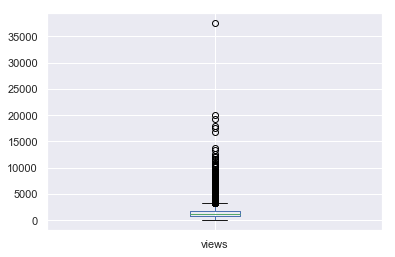

In [29]:
Egy.views.plot.box();

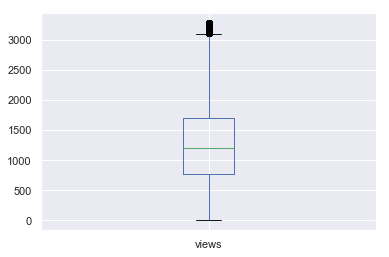

In [30]:
#Computing IQR for 'views' column

Q1 = EgyC['views'].quantile(0.25)
Q3 = EgyC['views'].quantile(0.75)
IQR = Q3 - Q1

# Finding boundaries 
Out= (Q3 + 1.5 * IQR)

# filtering out outliers
mask = (EgyC['views']<= Out) & (EgyC['views']>= 0)

EgyC = EgyC[mask]

# ploting the range after outliers removal 
EgyC.views.plot.box();

In [31]:
# The below values tell us that there is high chance to find outliers 
EgyC[['salary_maximum','salary_minimum']].describe()

,salary_maximum,salary_minimum
count,20632.000000,20632.000000
mean,5312.045754,3159.672111
std,12606.645021,6132.094571
min,0.000000,0.000000
25%,2500.000000,1500.000000
50%,4000.000000,2500.000000
75%,6000.000000,3500.000000
max,1000000.000000,528000.000000


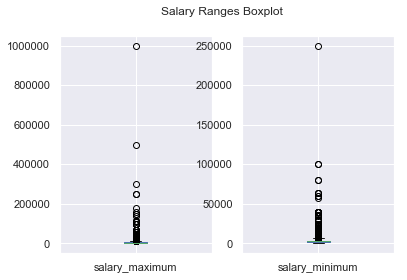

In [32]:
# This plot assures the existence of outliers 
Egy[['salary_maximum',"salary_minimum"]].plot(kind='box',subplots=True,title="Salary Ranges Boxplot" );

In [33]:
# Computing IQR for both columns
Q1mx = EgyC['salary_maximum'].quantile(0.25)
Q3mx = EgyC['salary_maximum'].quantile(0.75)
IQRmx = Q3mx - Q1mx

Q1mn = EgyC['salary_minimum'].quantile(0.25)
Q3mn = EgyC['salary_minimum'].quantile(0.75)
IQRmn = Q3mn - Q1mn


# Finding boundaries for the outliers
Q1mx - 1.5 * IQRmx
Outmx= (Q3mx + 1.5 * IQRmx)

Q1mn - 1.5 * IQRmn
Outmn=( Q3mn + 1.5 * IQRmn)

mask1=(EgyC['salary_minimum']<= Outmn) & (EgyC['salary_minimum']>= 0)
mask2=(EgyC['salary_maximum']<= Outmx) & (EgyC['salary_maximum']>= 0)
Filterd=EgyC[mask1 & mask2]


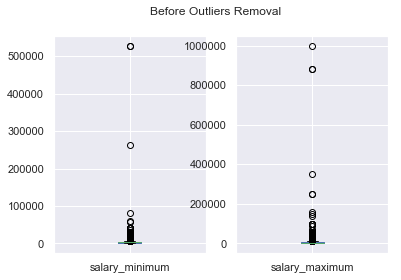

In [34]:
# Before Cleaning 

EgyC[['salary_minimum','salary_maximum']].plot(kind='box', subplots=True,title= 'Before Outliers Removal');

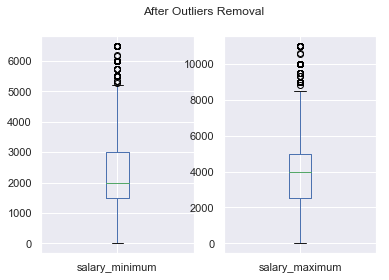

In [35]:
#After outliers removal we can see much improvement in the spread of the data.
Filterd[['salary_minimum','salary_maximum']].plot(kind='box', subplots=True,title= 'After Outliers Removal');

#### Merge the 2 datasets

In [36]:
#merged the 2 datasets to make analyses on the jobs and their corresponding applications
merged = pd.merge(df, Filterd,left_on=['job_id'], right_on = ['id'], how='inner')
merged.shape

(1428950, 22)

In [37]:
#No duplicates
merged.duplicated().any()

False

In [38]:
x=merged.job_id.value_counts() 

#x[x > 1]
x

dec0259e    1025
cae3e976     791
c3dfeecf     775
e295490f     557
7c281c13     551
29f63c4c     546
12458cae     530
6d237f94     518
72af6473     517
bc2d5c2c     504
d2aade5d     497
62206555     495
a13252e8     492
f7928ccf     492
56d9087a     490
510a55c5     490
408f49e7     490
484d1404     486
dc1a3418     482
fe10a373     473
1bf3ad3      469
bdd605ad     463
602dc50e     462
a122b82      459
b50142c3     455
9da090ce     450
fec50147     448
5113143      444
472c0db5     444
f31e19e9     441
            ... 
9bf1147e       1
1138da81       1
346b1209       1
12182f04       1
2264485b       1
d936252e       1
8f7d91d2       1
72144991       1
ca0d9054       1
acaa79eb       1
5cf4d5f1       1
3b8e533e       1
ad3ed197       1
2ab41932       1
4c03efe7       1
2fb1df91       1
9b551225       1
8fdc51c7       1
8dddbe93       1
8e8f4112       1
944bf31d       1
fba6a946       1
948e8dea       1
65303e1a       1
809e7b60       1
11b2ceca       1
ea31a9c5       1
d70c1ebc      

### Data Analysis

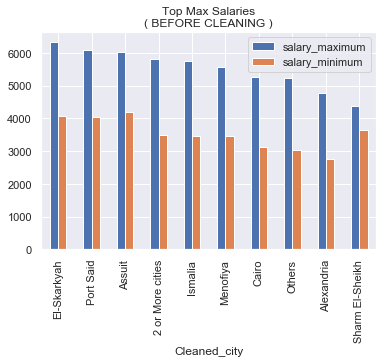

In [39]:
# this is the top paid cities before cleaning to see the effect of cleaning on the outcome of analyses 
Egy.groupby(['Cleaned_city'],sort=False)['salary_maximum','salary_minimum'].mean().sort_values(by='salary_maximum'
                ,ascending=False).head(10).plot.bar(title= 'Top Max Salaries\n( BEFORE CLEANING )');

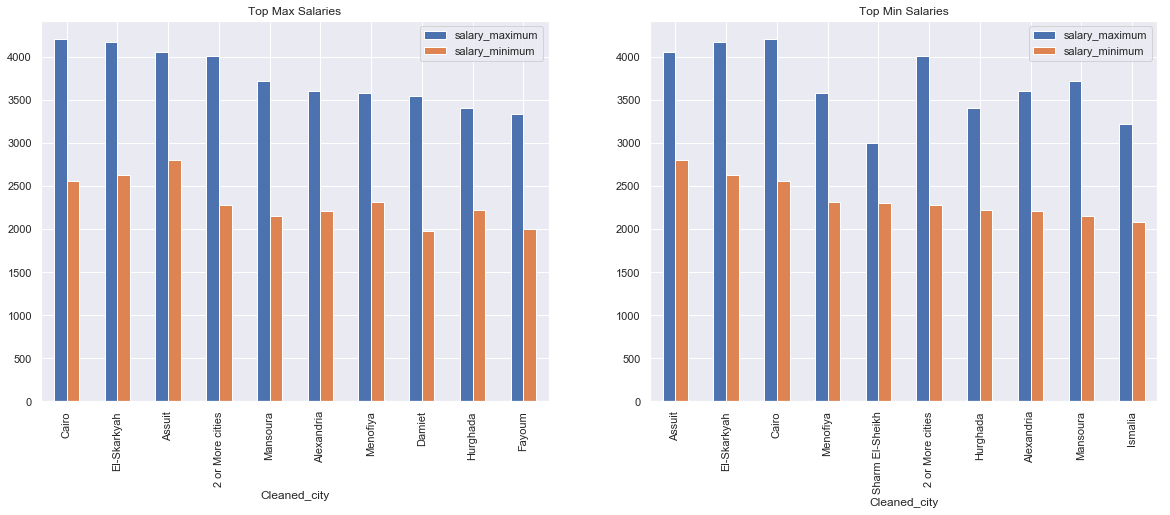

In [127]:
# the cleaned Top paid cities data 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

Filterd.groupby(['Cleaned_city'],sort=False)['salary_maximum','salary_minimum'].mean().sort_values(by='salary_maximum'
            ,ascending=False).head(10).plot.bar(ax =ax1,title='Top Max Salaries');


Filterd.groupby(['Cleaned_city'],sort=False)['salary_maximum','salary_minimum'].mean().sort_values(by='salary_minimum'
            ,ascending=False).head(10).plot.bar(ax=ax2,title='Top Min Salaries');

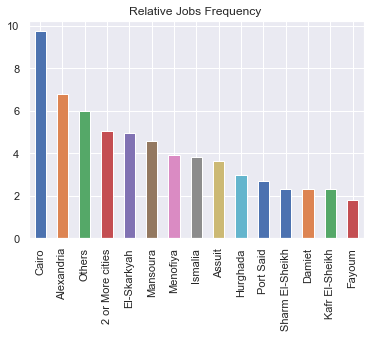

In [138]:
#As the difference is huge between the cities I normalized the data to facilitate comparison.
np.log(Filterd.Cleaned_city.value_counts()).plot.bar(title='Relative Jobs Frequency ');

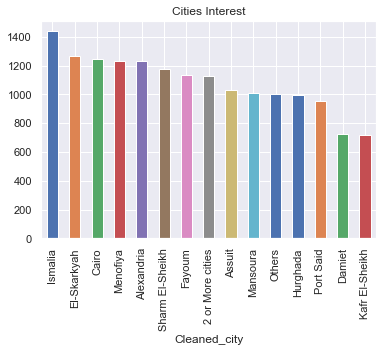

In [145]:
Filterd.groupby('Cleaned_city')['views'].mean().sort_values(ascending=False).plot.bar(title="Cities Interest");

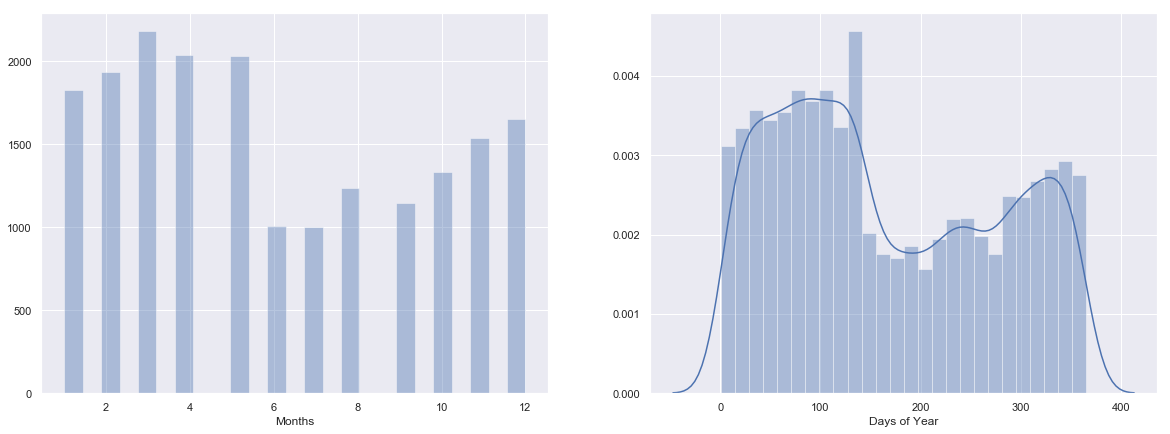

In [149]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))


data= Filterd.post_date.dt.month

sns.distplot(data  ,kde=False,ax=ax1,axlabel="Months");


data= Filterd.post_date.dt.dayofyear

sns.distplot(data  , ax=ax2, axlabel="Days of Year");



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


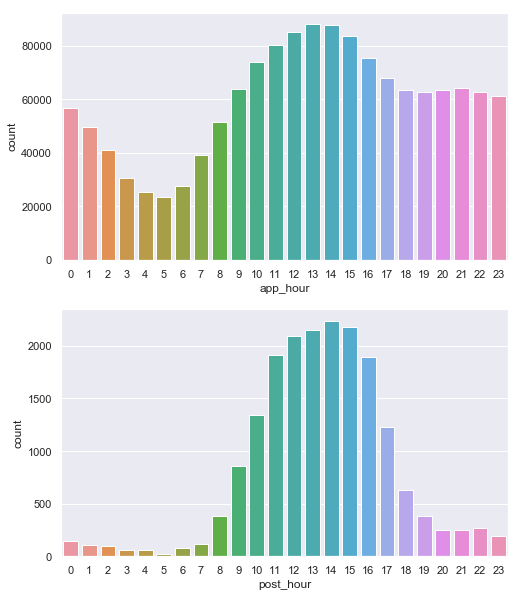

In [150]:
f,(ax1,ax2)=plt.subplots(2, 1, figsize=(8, 10))

merged['app_hour']=merged.app_date.dt.hour

Filterd['post_hour']=Filterd.post_date.dt.hour


sns.countplot(x='app_hour' ,data=merged ,ax=ax1)

sns.countplot(x='post_hour' ,data=Filterd ,ax=ax2);

In [47]:
Filterd['year']=Filterd.post_date.dt.year

Filterd['avg_salary']=(Filterd['salary_maximum']+Filterd['salary_minimum'])/2

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


D:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


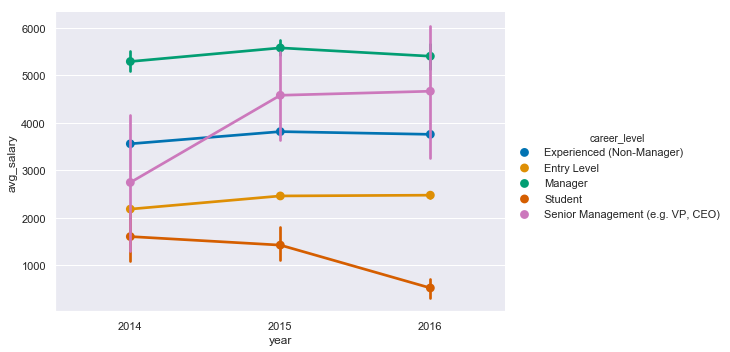

In [133]:
sns.factorplot(data=Filterd,hue='career_level' ,x='year',y='avg_salary',palette="colorblind",
                       size = 5,
                       kind= 'point',
                       aspect = 1.5,
                       legend_out=True);

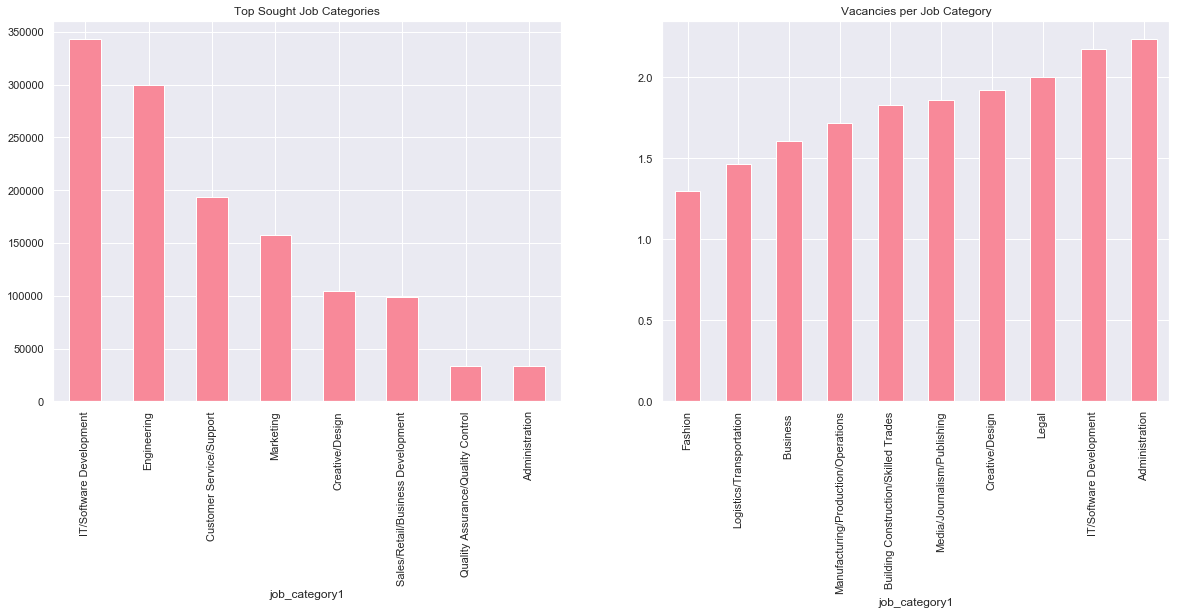

In [153]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

merged.groupby(['job_category1']).job_id.count().sort_values(ascending= False).head(8).plot(
    color='#f88999',ax=ax1,kind='bar',title="Top Sought Job Categories");

Filterd.groupby(['job_category1']).num_vacancies.mean().sort_values().head(10).plot(
    color='#f88999',ax=ax2,kind='bar',title="Vacancies per Job Category");


#### Future work

- Cities could be further cleaned to extract all cities including small egyptian cities and foreign cities .
- Country column could be added to include country name as there are few countries rather than Egypt.
- Job description could be adjusted to be more organized and have 
